In [1]:
import pandas as pd

# 1) Load CSV (put the correct path if it's in Drive)
df = pd.read_csv("/content/Mall_Customers.csv")

# 2) Quick peek
print(df.head())
print("\nShape:", df.shape)

# 3) Column types + non-null counts
print("\nInfo:")
print(df.info())

# 4) Missing values check
print("\nMissing values per column:")
print(df.isnull().sum())

# 5) Basic stats for numeric columns
print("\nDescribe numeric columns:")
print(df.describe())

# (Optional) If a Gender/Genre column exists, see its distribution
if 'Gender' in df.columns:
    print("\nGender distribution:")
    print(df['Gender'].value_counts())
elif 'Genre' in df.columns:
    print("\nGenre distribution:")
    print(df['Genre'].value_counts())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Shape: (200, 5)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing values per column:

In [2]:
from sklearn.preprocessing import StandardScaler

# 1) Select features (annual income & spending score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# 2) Scale features (K-Means works better with scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("First 5 rows after scaling:\n", X_scaled[:5])


First 5 rows after scaling:
 [[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


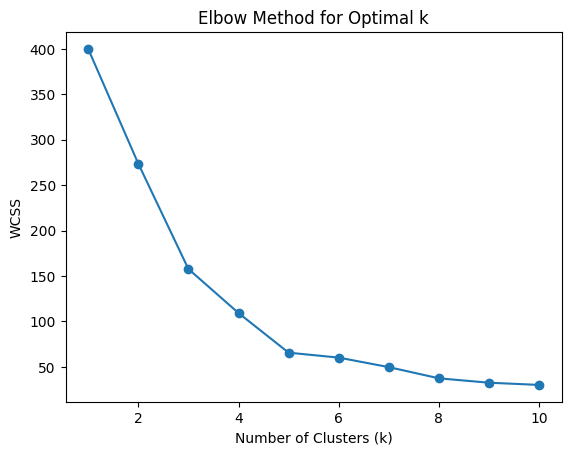

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within Cluster Sum of Squares

# Try k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


In [5]:
# Train KMeans with optimal k
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataset
df['Cluster'] = clusters

# Preview
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


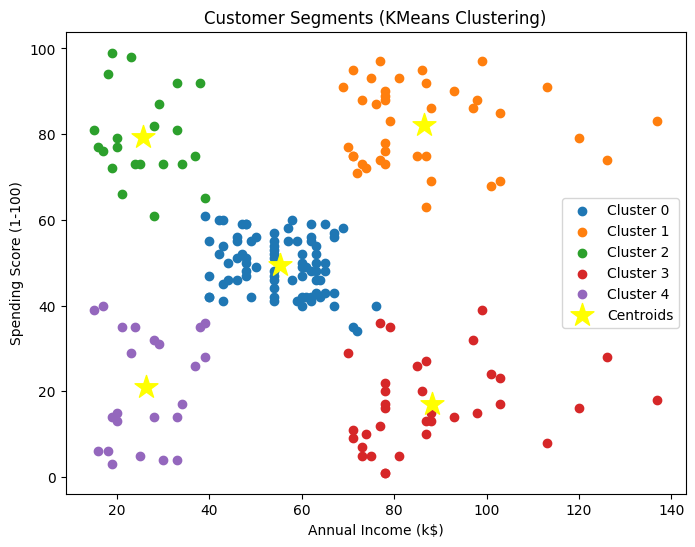

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Scatter plot for each cluster
for cluster in range(5):
    plt.scatter(
        df[df['Cluster'] == cluster]['Annual Income (k$)'],
        df[df['Cluster'] == cluster]['Spending Score (1-100)'],
        label=f'Cluster {cluster}'
    )

# Plot cluster centers
plt.scatter(
    kmeans.cluster_centers_[:, 0] * X[:, 0].std() + X[:, 0].mean(),
    kmeans.cluster_centers_[:, 1] * X[:, 1].std() + X[:, 1].mean(),
    s=300, c='yellow', marker='*', label='Centroids'
)

plt.title("Customer Segments (KMeans Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()
